## Check environment

In [ ]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
# We need to install the correct cuDNN according to this output
!/usr/local/cuda/bin/nvcc --version
# take a look at the kind of GPU we have
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Tue Apr  9 09:17:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              23W / 30

## Mount Drive

In [ ]:
# Alternatively, skip this cell and mount drive from left sidebar.
%cd ..
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

/
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# Make the working folder
%mkdir -p /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable

In [ ]:
# list the contents of /mydrive
!ls -la /mydrive
!ls -la

ls: cannot access '/mydrive': No such file or directory
total 16
drwx------ 2 root root 4096 Apr  4 17:30 3--dangerous-goods-label-4
drwx------ 2 root root 4096 Apr  4 17:13 flamable_dataset
drwx------ 2 root root 4096 Apr  4 17:15 oil-spill-detection-2
drwx------ 2 root root 4096 Apr  4 17:10 TACO:-Trash-Annotations-in-Context-Dataset-15


## Clone yolov8

install ultralystics library for Yolov8

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable
#%mkdir -p /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/backup_flamable_new
#%mkdir -p /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new

/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 28.9/201.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


## Prepare dataset

getting trash dataset first -- this data set became unused and is not used in the final dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wXptZbVeImpolkixdKXS")
project = rf.workspace("mohamed-traore-2ekkp").project("taco-trash-annotations-in-context")
version = project.version(15)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TACO:-Trash-Annotations-in-Context-Dataset-15 in yolov8:: 100%|██████████| 7206/7206 [00:49<00:00, 144.33it/s]


In [ ]:
import os
import shutil
from glob import glob
from sklearn.model_selection import train_test_split

# Define your class names and mapping as before
class_names = [
      'Normal paper',  'Cardboard',
    'Styrofoam piece'
]

class_mapping = {
      28: 0,  35: 1, 55: 2
}

# Define your base and new directories as before
base_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/TACO:-Trash-Annotations-in-Context-Dataset-15'
new_base_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new'
dirs = ['train', 'val', 'test']

# Create new dataset structure
for d in dirs:
    os.makedirs(os.path.join(new_base_dir, d, 'images'), exist_ok=True)
    os.makedirs(os.path.join(new_base_dir, d, 'labels'), exist_ok=True)

# Function to process and copy files
def process_and_copy_files(files, destination):
    for label_file in files:
        with open(label_file, 'r') as file:
            lines = file.readlines()
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id in class_mapping:
                    parts[0] = str(class_mapping[class_id])
                    new_lines.append(' '.join(parts))
            if new_lines:
                img_file = label_file.replace('/labels/', '/images/').replace('.txt', '.jpg')
                new_img_path = os.path.join(destination, 'images', os.path.basename(img_file))
                new_label_path = os.path.join(destination, 'labels', os.path.basename(label_file))

                # Ensure directory exists
                os.makedirs(os.path.dirname(new_img_path), exist_ok=True)
                os.makedirs(os.path.dirname(new_label_path), exist_ok=True)

                shutil.copy(img_file, new_img_path)
                with open(new_label_path, 'w') as f:
                    f.write('\n'.join(new_lines))

# Glob to find all label files and split them
label_files = glob(os.path.join(base_dir, '*', 'labels', '*.txt'))
train_files, test_files = train_test_split(label_files, test_size=0.15, random_state=42)
val_files, test_files = train_test_split(test_files, test_size=1/3, random_state=42)

# Process and copy files
process_and_copy_files(train_files, os.path.join(new_base_dir, 'train'))
process_and_copy_files(val_files, os.path.join(new_base_dir, 'val'))
process_and_copy_files(test_files, os.path.join(new_base_dir, 'test'))

print("Dataset processing complete.")



Dataset processing complete.


split dataset in to training, test and validation sets

In [ ]:
from glob import glob
import os

def verify_class_representation(base_dir, class_names):
    splits = ['train', 'valid', 'test']
    class_counts = {split: {class_name: 0 for class_name in class_names} for split in splits}

    # Extend class_names to include the newly added class if necessary
    extended_class_names = class_names.copy()
    extended_class_names.append('Newly Added Class')  # Replace with actual name if needed

    for split in splits:
        label_files = glob(os.path.join(base_dir, split, 'labels', '*.txt'))
        for file_path in label_files:
            with open(file_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    parts = line.strip().split()
                    # Convert class_id from float to int
                    class_id = int(float(parts[0]))
                    try:
                        class_name = extended_class_names[class_id]
                        class_counts[split][class_name] += 1
                    except IndexError:
                        # Handle case where class_id is outside the expected range
                        print(f"Unexpected class ID {class_id} in file: {file_path}")

    # Print the class distribution
    for split in splits:
        print(f"Class distribution in {split} set:")
        for class_name in class_names:  # Only print for expected classes
            print(f"  {class_name}: {class_counts[split].get(class_name, 0)}")
    print("Verification complete.")

# Assuming you have a class_names list defined somewhere above
class_names = [
    'Aerosol', 'Battery', 'Normal paper', 'Paper bag',
    'Cardboard', 'Styrofoam piece', 'Tissues', 'Toilet tube',
    'Wrapping paper', 'Oil', 'Hazard'  # Ensure this is added if you're consolidating classes under a new ID
]

# Call the verification function for your dataset
flamable_dataset_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new'
verify_class_representation(flamable_dataset_dir, class_names)


Unexpected class ID 28 in file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/valid/labels/Truck130_jpg.rf.417b15633e8d6b138cde1bcbd34c587a.txt
Unexpected class ID 28 in file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/valid/labels/Truck130_jpg.rf.417b15633e8d6b138cde1bcbd34c587a.txt
Unexpected class ID 23 in file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/valid/labels/Truck176_jpg.rf.9cd9e6bf09cba53fadf30a3b3e5e2079.txt
Unexpected class ID 26 in file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/valid/labels/Truck232_jpg.rf.de1336747407eda3e6c833dbd0956125.txt
Unexpected class ID 25 in file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/valid/labels/Truck248_jpg.rf.cc2d6943e6ddab6d20db50e8fc68cb50.txt
Unexpected class ID 23 in file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/valid/labels/Truck269_


Class distribution in train:
Wrapping paper: 24
Normal paper: 174
Tissues: 78
Styrofoam piece: 255
Paper bag: 48
Cardboard: 148
Aerosol: 24
Battery: 2
Toilet tube: 6
Oil: 997
Hazard: 298


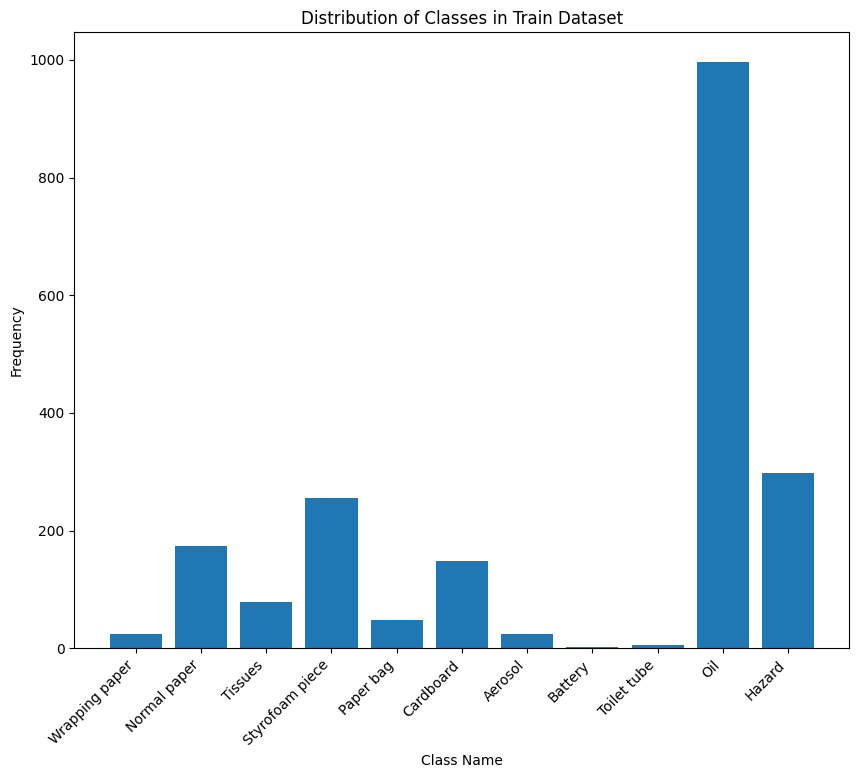


Class distribution in test:
Normal paper: 12
Styrofoam piece: 17
Cardboard: 5
Wrapping paper: 1
Battery: 1
Tissues: 5
Oil: 63
Hazard: 41


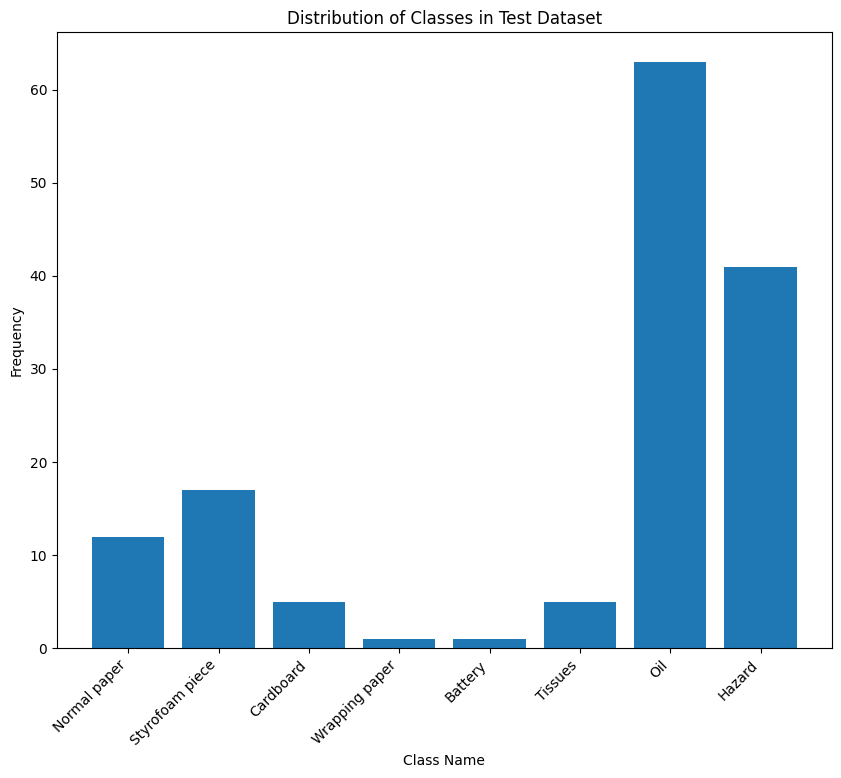


Class distribution in val:
Styrofoam piece: 22
Normal paper: 20
Aerosol: 4
Paper bag: 9
Tissues: 11
Cardboard: 9
Wrapping paper: 3
Battery: 1
Toilet tube: 1
Oil: 124
Hazard: 96


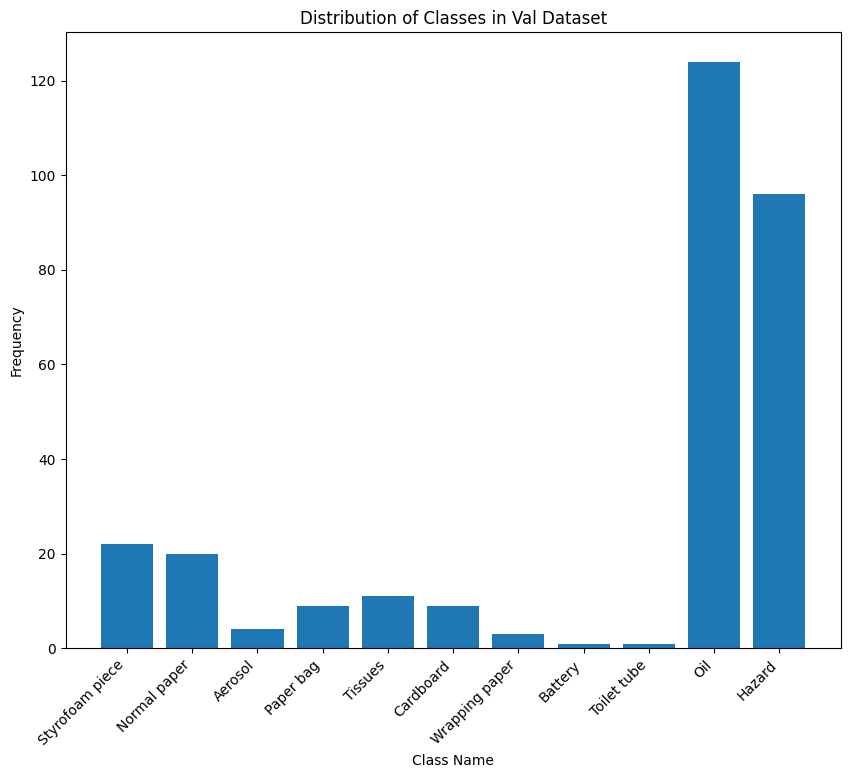

In [ ]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Base path to your dataset
dataset_base_path = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset'

# Splits in your dataset
splits = ['train', 'test', 'val']

# List of class names in your dataset
class_names = [
    'Wrapping paper', 'Oil', 'Hazard'
]

# Function to count class instances in a given directory
def count_classes_in_split(split_path):
    annotations_dir = os.path.join(split_path, 'labels')
    class_counts = Counter()
    for filename in os.listdir(annotations_dir):
        if filename.endswith(".txt") and not filename.startswith("classes"):  # Avoid reading a classes.txt file
            with open(os.path.join(annotations_dir, filename), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])  # Extract class_id from each line
                    if class_id < 0 or class_id >= len(class_names)+1:
                        #print(f"Invalid class ID {class_id} in file: {filename}")
                        continue  # Skip this line if class_id is invalid
                    class_counts[class_names[class_id]] += 1
    return class_counts

# Loop over each dataset split and calculate class distribution
for split in splits:
    print(f"\nClass distribution in {split}:")
    split_path = os.path.join(dataset_base_path, split)
    class_counts = count_classes_in_split(split_path)
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")

    # Optionally, visualize the distribution as a bar chart for each split
    plt.figure(figsize=(10, 8))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class Name')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Classes in {split.capitalize()} Dataset')
    plt.xticks(rotation=45, ha="right")
    plt.show()


This cardboard is the first part of th new dataset which is to be added

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wXptZbVeImpolkixdKXS")
project = rf.workspace("dataset-t7hz7").project("cardboard-eupc8")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.43, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Cardboard-3 in yolov8:: 100%|██████████| 1579/1579 [00:09<00:00, 171.71it/s]


splitting and adding carboard datset to the new dataset

In [ ]:
import os
import shutil
from glob import glob
from sklearn.model_selection import train_test_split

def move_and_update_labels(src_images_dir, src_labels_dir, dest_dirs, split_ratios):
    image_files = glob(os.path.join(src_images_dir, '*.*'))
    image_files = [os.path.basename(f) for f in image_files if os.path.isfile(f) and f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print(f"No image files found in {src_images_dir}.")
        return

    train_val_files, test_files = train_test_split(image_files, test_size=split_ratios['test'], random_state=42)
    train_files, val_files = train_test_split(train_val_files, test_size=split_ratios['val'] / (1 - split_ratios['test']), random_state=42)

    def copy_and_update_file(file_name, src_dir, dest_dir, is_label=False):
        src_path = os.path.join(src_dir, file_name)
        dest_path = os.path.join(dest_dir, file_name)
        # Ensure the directory for the destination file exists
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        if is_label and os.path.exists(src_path):
            with open(src_path, 'r') as file:
                lines = [line.replace('0 ', '0 ', 1) for line in file.readlines()]
            with open(dest_path, 'w') as file:
                file.writelines(lines)
        elif not is_label:
            shutil.copy(src_path, dest_path)

    def process_files(files, src_image_dir, src_label_dir, dest_image_dir, dest_label_dir):
        for file in files:
            image_file = file
            label_file = file.rsplit('.', 1)[0] + '.txt'
            # Calls to copy_and_update_file include directory creation
            copy_and_update_file(image_file, src_image_dir, dest_image_dir)
            copy_and_update_file(label_file, src_label_dir, dest_label_dir, is_label=True)

    # Process each dataset partition
    process_files(train_files, src_images_dir, src_labels_dir, dest_dirs['train']+'/images', dest_dirs['train']+'/labels')
    process_files(val_files, src_images_dir, src_labels_dir, dest_dirs['valid']+'/images', dest_dirs['valid']+'/labels')
    process_files(test_files, src_images_dir, src_labels_dir, dest_dirs['test']+'/images', dest_dirs['test']+'/labels')

    print("Files processed successfully.")

# Define source and destination directories
oil_dataset_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/Cardboard-3'  # Adjust the path as needed
flamable_dataset_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new'

dest_dirs = {
    'train': os.path.join(flamable_dataset_dir, 'train'),
    'valid': os.path.join(flamable_dataset_dir, 'valid'),
    'test': os.path.join(flamable_dataset_dir, 'test'),
}

split_ratios = {'test': 0.05, 'val': 0.10}

move_and_update_labels(
    src_images_dir=os.path.join(oil_dataset_dir, 'train', 'images'),
    src_labels_dir=os.path.join(oil_dataset_dir, 'train', 'labels'),
    dest_dirs=dest_dirs,
    split_ratios=split_ratios
)


Files processed successfully.


adding oil dataset to the new datset


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wXptZbVeImpolkixdKXS")
project = rf.workspace("daisycat1008-outlook-com").project("oil-spill-detection-q6qid")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to oil-spill-detection-2 in yolov8:: 100%|██████████| 2123/2123 [00:12<00:00, 166.31it/s]


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new

!mkdir train
!mkdir test
!mkdir val
%cd /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train
!mkdir images
!mkdir labels

%cd /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test
!mkdir images
!mkdir labels
%cd /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/val
!mkdir labels

/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new
/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train
/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test
/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/val


Splitting datset and adding it to the new dataset

In [ ]:
import os
import shutil
from glob import glob
from sklearn.model_selection import train_test_split

def move_and_update_labels(src_images_dir, src_labels_dir, dest_dirs, split_ratios):
    image_files = glob(os.path.join(src_images_dir, '*.*'))
    image_files = [os.path.basename(f) for f in image_files if os.path.isfile(f) and f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print(f"No image files found in {src_images_dir}.")
        return

    train_val_files, test_files = train_test_split(image_files, test_size=split_ratios['test'], random_state=42)
    train_files, val_files = train_test_split(train_val_files, test_size=split_ratios['valid'] / (1 - split_ratios['test']), random_state=42)

    def copy_and_update_file(file_name, src_dir, dest_dir, is_label=False):
        src_path = os.path.join(src_dir, file_name)
        dest_path = os.path.join(dest_dir, file_name)
        if is_label and os.path.exists(src_path):
            with open(src_path, 'r') as file:
                lines = [line.replace('0 ', '1 ', 1) for line in file.readlines()]
            with open(dest_path, 'w') as file:
                file.writelines(lines)
        elif not is_label:
            shutil.copy(src_path, dest_path)

    def process_files(files, src_image_dir, src_label_dir, dest_image_dir, dest_label_dir):
        for file in files:
            image_file = file
            label_file = file.rsplit('.', 1)[0] + '.txt'
            copy_and_update_file(image_file, src_image_dir, dest_image_dir)
            copy_and_update_file(label_file, src_label_dir, dest_label_dir, is_label=True)

    # Process each dataset partition
    process_files(train_files, src_images_dir, src_labels_dir, dest_dirs['train']+'/images', dest_dirs['train']+'/labels')
    process_files(val_files, src_images_dir, src_labels_dir, dest_dirs['valid']+'/images', dest_dirs['valid']+'/labels')
    process_files(test_files, src_images_dir, src_labels_dir, dest_dirs['test']+'/images', dest_dirs['test']+'/labels')

    print("Files processed successfully.")

# Define source and destination directories
oil_dataset_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/oil-spill-detection-2'  # Adjust the path as needed
flamable_dataset_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new'

dest_dirs = {
    'train': os.path.join(flamable_dataset_dir, 'train'),
    'valid': os.path.join(flamable_dataset_dir, 'valid'),
    'test': os.path.join(flamable_dataset_dir, 'test'),
}

split_ratios = {'test': 0.05, 'valid': 0.10}

move_and_update_labels(
    src_images_dir=os.path.join(oil_dataset_dir, 'train', 'images'),
    src_labels_dir=os.path.join(oil_dataset_dir, 'train', 'labels'),
    dest_dirs=dest_dirs,
    split_ratios=split_ratios
)


Files processed successfully.


now adding hazard Symbol Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wXptZbVeImpolkixdKXS")
project = rf.workspace("port-of-kiel").project("3-dangerous-goods-label")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 3--dangerous-goods-label-4 in yolov8:: 100%|██████████| 606/606 [00:04<00:00, 150.51it/s]


Splitting datset and adding to new datset

In [ ]:
import os
import shutil
from glob import glob

def move_and_remap_labels(src_base_dir, dest_base_dir, remap_class_id=2):
    parts = ['train', 'valid', 'test']

    for part in parts:
        if part == 'valid':
          src_images_dir = os.path.join(src_base_dir, part, 'images')
          src_labels_dir = os.path.join(src_base_dir, part, 'labels')
          dest_images_dir = os.path.join(dest_base_dir, 'valid', 'images')
          dest_labels_dir = os.path.join(dest_base_dir, 'valid', 'labels')
        else:
          src_images_dir = os.path.join(src_base_dir, part, 'images')
          src_labels_dir = os.path.join(src_base_dir, part, 'labels')
          dest_images_dir = os.path.join(dest_base_dir, part, 'images')
          dest_labels_dir = os.path.join(dest_base_dir, part, 'labels')

        # Ensure source directories exist
        if not os.path.exists(src_images_dir) or not os.path.exists(src_labels_dir):
            print(f"Source directories do not exist for {part}: {src_images_dir} or {src_labels_dir}")
            continue

        # Create destination directories if they don't exist
        os.makedirs(dest_images_dir, exist_ok=True)
        os.makedirs(dest_labels_dir, exist_ok=True)

        # Get all image files in the source images directory
        image_files = glob(os.path.join(src_images_dir, '*'))
        image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        for image_path in image_files:
            basename = os.path.basename(image_path)
            label_basename = os.path.splitext(basename)[0] + '.txt'
            src_label_path = os.path.join(src_labels_dir, label_basename)
            dest_label_path = os.path.join(dest_labels_dir, label_basename)

            # Copy image to the corresponding destination directory
            shutil.copy(image_path, dest_images_dir)

            # Update and copy label, if exists
            if os.path.exists(src_label_path):
                with open(src_label_path, 'r') as file:
                    lines = file.readlines()
                    updated_lines = [str(remap_class_id) + line[1:] for line in lines]

                with open(dest_label_path, 'w') as file:
                    file.writelines(updated_lines)
            else:
                print(f"Label file does not exist: {src_label_path}")

    print("Files processed and labels remapped successfully.")

# Define your directories
src_base_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/3--dangerous-goods-label-4'  # Update this path
dest_base_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new'

# Execute the function to move and remap labels
move_and_remap_labels(src_base_dir, dest_base_dir, remap_class_id=2)


Files processed and labels remapped successfully.


adding copy of dataset for augmentation


In [ ]:
import os
import shutil

def copy_dataset(src, dest):
    """
    Copy the dataset from src to dest.

    Parameters:
    - src (str): Source path of the dataset.
    - dest (str): Destination path where the dataset copy will be stored.
    """
    try:
        # Copy entire directory tree to a new location
        shutil.copytree(src, dest)
        print(f"Dataset copied successfully from {src} to {dest}.")
    except shutil.Error as e:
        print(f"Directory not copied. Error: {e}")
    except OSError as e:
        print(f"Directory not copied. Error: {e}")

# Define your source and destination paths
src_dataset_path = "/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset"
dest_dataset_path = "/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_original"

# Make sure the destination directory does not exist to avoid errors
if os.path.exists(dest_dataset_path):
    print(f"Destination path '{dest_dataset_path}' already exists. Please choose a different destination or remove the existing one.")
else:
    copy_dataset(src_dataset_path, dest_dataset_path)


Dataset copied successfully from /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset to /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_original.


Augmenting dataset to needed quantity for each class

In [ ]:
import os
import cv2
import numpy as np

def load_labels(label_path):
    """Manually load label file to account for variable number of columns and class IDs as floats."""
    with open(label_path, 'r') as file:
        lines = file.readlines()
    labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 5:  # Expect at least class_id and bbox coordinates
            class_id = float(parts[0])
            labels.append([class_id, *map(float, parts[1:5])])
    return np.array(labels, dtype=np.float32)

def augment_image(image, bboxes, save_path_image, save_path_label):
    """Apply basic augmentations and save."""
    h, w = image.shape[:2]

    # Define transformations
    transformations = {
        'horizontal_flip': {'apply': lambda img: cv2.flip(img, 1),
                            'bbox': lambda x: 1 - x},
        # Add more transformations as needed
    }

    for transformation, details in transformations.items():
        # Apply image transformation
        transformed_image = details['apply'](image)

        # Apply bounding box transformation
        transformed_bboxes = bboxes.copy()
        transformed_bboxes[:, 1] = details['bbox'](bboxes[:, 1])  # Modify x_center for horizontal flip

        # Save augmented image
        img_filename = f"{save_path_image}_{transformation}.jpg"
        cv2.imwrite(img_filename, transformed_image)

        # Save augmented labels
        label_filename = f"{save_path_label}_{transformation}.txt"
        with open(label_filename, 'w') as f:
            for bbox in transformed_bboxes:
                f.write(' '.join(map(str, bbox.tolist())) + '\n')

        # Print message indicating successful augmentation
        print(f"Augmented {img_filename} and saved with transformation: {transformation}")

def augment_dataset_to_minimum(dataset_dir, minimum_count=1000):
    """Augment images in the dataset to ensure a minimum count per class, but only for classes 0, 1, and 2."""
    class_counts = {}
    augmentations_needed = {}

    # Determine current class counts
    for split in ['train', 'valid', 'test']:
        label_dir = os.path.join(dataset_dir, split, 'labels')
        for label_file in os.listdir(label_dir):
            bboxes = load_labels(os.path.join(label_dir, label_file))
            for bbox in bboxes:
                class_id = int(bbox[0])
                # Count only classes 0, 1, and 2
                if class_id in [0, 1, 2]:
                    class_counts[class_id] = class_counts.get(class_id, 0) + 1

    # Determine needed augmentations per class, but only for classes 0, 1, and 2
    for class_id in [0, 1, 2]:
        count = class_counts.get(class_id, 0)  # Use get to handle case where class_id might not be in class_counts
        if count < minimum_count:
            augmentations_needed[class_id] = minimum_count - count
        print(augmentations_needed)
    # Apply augmentations
    for split in ['train', 'valid', 'test']:
        image_dir = os.path.join(dataset_dir, split, 'images')
        label_dir = os.path.join(dataset_dir, split, 'labels')
        for image_file in os.listdir(image_dir):
            base_filename = os.path.splitext(image_file)[0]
            image_path = os.path.join(image_dir, image_file)
            label_path = os.path.join(label_dir, f"{base_filename}.txt")

            if os.path.exists(label_path):
                bboxes = load_labels(label_path)
                image = cv2.imread(image_path)

                for class_id in augmentations_needed:
                    if any(bbox[0] == class_id for bbox in bboxes):
                        # Determine save paths for augmented data
                        save_path_image = os.path.join(image_dir, base_filename)
                        save_path_label = os.path.join(label_dir, base_filename)
                        augment_image(image, bboxes, save_path_image, save_path_label)
                        augmentations_needed[class_id] -= 1
                        # Print progress
                        print(f"Augmented class {class_id}: Remaining {augmentations_needed[class_id]}")
                        if augmentations_needed[class_id] <= 0:
                            break  # Stop if we've met the minimum count

    # Print out classes for which augmentations were needed and completed
    for class_id, needed in augmentations_needed.items():
        print(f"Class {class_id} augmentation completed. Needed: {needed}, Now: {minimum_count - needed}")

# Example usage
dataset_dir = "/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new"  # Update this path as needed
augment_dataset_to_minimum(dataset_dir)


{}
{}
{2: 130}
Augmented /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/images/1669441202542_png_jpg.rf.d73085366822112b2c724ded889989d4_horizontal_flip.jpg and saved with transformation: horizontal_flip
Augmented class 2: Remaining 129
Augmented /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/images/1669441202594_png_jpg.rf.b7de1b02ca928a9dd8d23072aa734aba_horizontal_flip.jpg and saved with transformation: horizontal_flip
Augmented class 2: Remaining 128
Augmented /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/images/17_png_jpg.rf.c6000d3572c42da25a5ee36efbbd1318_horizontal_flip.jpg and saved with transformation: horizontal_flip
Augmented class 2: Remaining 127
Augmented /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/images/1_png_jpg.rf.4a81aff4f4a6c716dbb7def7ae7eca54_horizontal_flip.jpg and saved with transformation: horizontal_flip
Augmented cla

In [ ]:
import os
import glob

def delete_wrong_labels(dataset_dir, allowed_classes=[0, 1, 2]):
    """
    Delete label files that contain classes other than the specified allowed classes,
    and delete the corresponding images.

    Args:
    - dataset_dir: Path to the dataset directory. Expected to contain 'train', 'val', 'test' subdirectories.
    - allowed_classes: List of allowed class IDs.
    """
    for split in ['train', 'val', 'test']:
        label_dir = os.path.join(dataset_dir, split, 'labels')
        image_dir = os.path.join(dataset_dir, split, 'images')

        # Find all label files in the directory
        label_files = glob.glob(os.path.join(label_dir, '*.txt'))

        for label_file in label_files:
            delete_file = False

            with open(label_file, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(float(line.split()[0]))  # Convert to int, handling class IDs formatted as floats

                    # Check if the class ID is not allowed
                    if class_id not in allowed_classes:
                        delete_file = True
                        break

            # If a wrong label was found, delete both the label and the corresponding image
            if delete_file:
                # Determine the corresponding image file name
                image_file_name = os.path.basename(label_file).replace('.txt', '')
                image_file_path = glob.glob(os.path.join(image_dir, image_file_name + '.*'))  # Supports various image formats

                # Delete the label file
                os.remove(label_file)
                print(f"Deleted label file: {label_file}")

                # Delete the corresponding image file
                if image_file_path:
                    os.remove(image_file_path[0])
                    print(f"Deleted corresponding image file: {image_file_path[0]}")
                else:
                    print(f"No corresponding image file found for label: {label_file}")

# Example usage
dataset_dir = "/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new"  # Update this path as needed
delete_wrong_labels(dataset_dir)


Deleted label file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/labels/36_png_jpg.rf.70339a7542b4fbb92492625953319e9d.txt
Deleted corresponding image file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/images/36_png_jpg.rf.70339a7542b4fbb92492625953319e9d.jpg
Deleted label file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/labels/40_png_jpg.rf.c0b33f6cc038d18656375220cedf060c.txt
Deleted corresponding image file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/images/40_png_jpg.rf.c0b33f6cc038d18656375220cedf060c.jpg
Deleted label file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/labels/6_png_jpg.rf.a3f17bafa85eeba6ac754b3dd75dc86c.txt
Deleted corresponding image file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/train/images/6_png_jpg.rf.a3f17bafa85eeba6ac754b3dd75dc86c.jpg


In [ ]:
import os
import random
import glob

def delete_class_examples(dataset_split_dir, class_id, num_to_delete):
    """
    Delete a specified number of examples for a given class from a dataset split (train/val).

    Args:
    - dataset_split_dir: Path to the dataset split directory (train or val).
                         This directory should contain 'images' and 'labels' subdirectories.
    - class_id: The class ID for which examples will be deleted.
    - num_to_delete: The number of examples to delete for the specified class.
    """
    label_dir = os.path.join(dataset_split_dir, 'labels')
    image_dir = os.path.join(dataset_split_dir, 'images')

    # Find all label files that contain the specified class_id
    eligible_files = []
    for label_file in glob.glob(os.path.join(label_dir, '*.txt')):
        with open(label_file, 'r') as file:
            if any(int(float(line.split()[0])) == class_id for line in file):
                eligible_files.append(label_file)

    # Randomly select files to delete
    files_to_delete = random.sample(eligible_files, min(len(eligible_files), num_to_delete))

    for label_file in files_to_delete:
        # Determine the corresponding image file name
        image_file_base = os.path.splitext(os.path.basename(label_file))[0]
        image_files = glob.glob(os.path.join(image_dir, image_file_base + '.*'))  # Support various image formats

        # Delete the label file
        os.remove(label_file)
        print(f"Deleted label file: {label_file}")

        # Delete the corresponding image file(s)
        for image_file in image_files:
            os.remove(image_file)
            print(f"Deleted corresponding image file: {image_file}")

# Example usage
dataset_split_dir = "/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test"  # Update this path as needed
class_id = 2  # Specify the class ID to delete
num_to_delete = 20  # Specify the number of examples to delete
delete_class_examples(dataset_split_dir, class_id, num_to_delete)

Deleted label file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/labels/Truck191_jpg.rf.1eba73ba2c2e5679ceb4039e5de4d3ac_horizontal_flip.txt
Deleted corresponding image file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/images/Truck191_jpg.rf.1eba73ba2c2e5679ceb4039e5de4d3ac_horizontal_flip.jpg
Deleted label file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/labels/Truck393_jpg.rf.2ceb2c48080497ad0ce86dff5886e706_horizontal_flip_horizontal_flip.txt
Deleted corresponding image file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/images/Truck393_jpg.rf.2ceb2c48080497ad0ce86dff5886e706_horizontal_flip_horizontal_flip.jpg
Deleted label file: /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/labels/Truck393_jpg.rf.2ceb2c48080497ad0ce86dff5886e706_horizontal_flip.txt
Deleted corresponding image file: /content/drive/MyDriv

## Train (starting)

In [ ]:
%cd /content/Fire-Detection-2/train_split/images
!ls -la

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root   50172 Mar  6 19:49 MirrorWEBFire2085_jpg.rf.1caaaa9be418537b4a387b980c4a50d5.jpg
-rw-r--r-- 1 root root   49976 Mar  6 19:50 MirrorWEBFire2085_jpg.rf.588174233d124df22594637bd8dbba8a.jpg
-rw-r--r-- 1 root root   49956 Mar  6 19:50 MirrorWEBFire2085_jpg.rf.8bc40aa8d574502b4b8421533cec3c44.jpg
-rw-r--r-- 1 root root   47371 Mar  6 19:50 MirrorWEBFire2085_jpg.rf.abf221d0dafea6c4538f720c325c0dcc.jpg
-rw-r--r-- 1 root root   50319 Mar  6 19:50 MirrorWEBFire2085_jpg.rf.c5ec6bd4302a44d72d44f911cd369b32.jpg
-rw-r--r-- 1 root root   35319 Mar  6 19:50 MirrorWEBFire209_jpg.rf.6c55d27826c7b6992e677a8581189895.jpg
-rw-r--r-- 1 root root   36609 Mar  6 19:50 MirrorWEBFire209_jpg.rf.878487431765b1769d94072778abf030.jpg
-rw-r--r-- 1 root root   36681 Mar  6 19:50 MirrorWEBFire209_jpg.rf.c8944536417d032516345e7dd3b239ff.jpg
-rw-r--r-- 1 root root   35701 Mar  6 19:50 MirrorWEBFire209_jpg.rf.dc62741fbfcb83f6be037affbe6f7687.jpg

In [ ]:

#!yolo task=detect mode=train model=yolov8m.pt data=/content/flamable_dataset/data.yaml epochs=150 imgsz=640 patience=20

!yolo task=detect mode=train \
model=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/yolov8n.pt \
data=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/data.yaml \
imgsz=640 \
epochs=150 \
batch=32 \
optimizer=SGD \
momentum=0.937 \
weight_decay=0.0005 \
patience=30 \
augment=True \
rect=False \
project=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/backup_flamable \
name=Trainingrun_Advanced_Augmentation_SGD \
workers=4 \
cache=True \
verbose=True \




New https://pypi.org/project/ultralytics/8.1.44 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/yolov8m.pt, data=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/data.yaml, epochs=150, time=None, patience=30, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=4, project=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/backup_flamable, name=Trainingrun_Advanced_Augmentation_SGD, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, 

**Check if weights have been saved**


In [ ]:
!ls /mydrive/yolov4/backup_fire

yolov4-fire-xilinx_1000.weights  yolov4-fire-xilinx_best.weights   yolov4-fire-xilinx_last.weights
yolov4-fire-xilinx_2000.weights  yolov4-fire-xilinx_final.weights


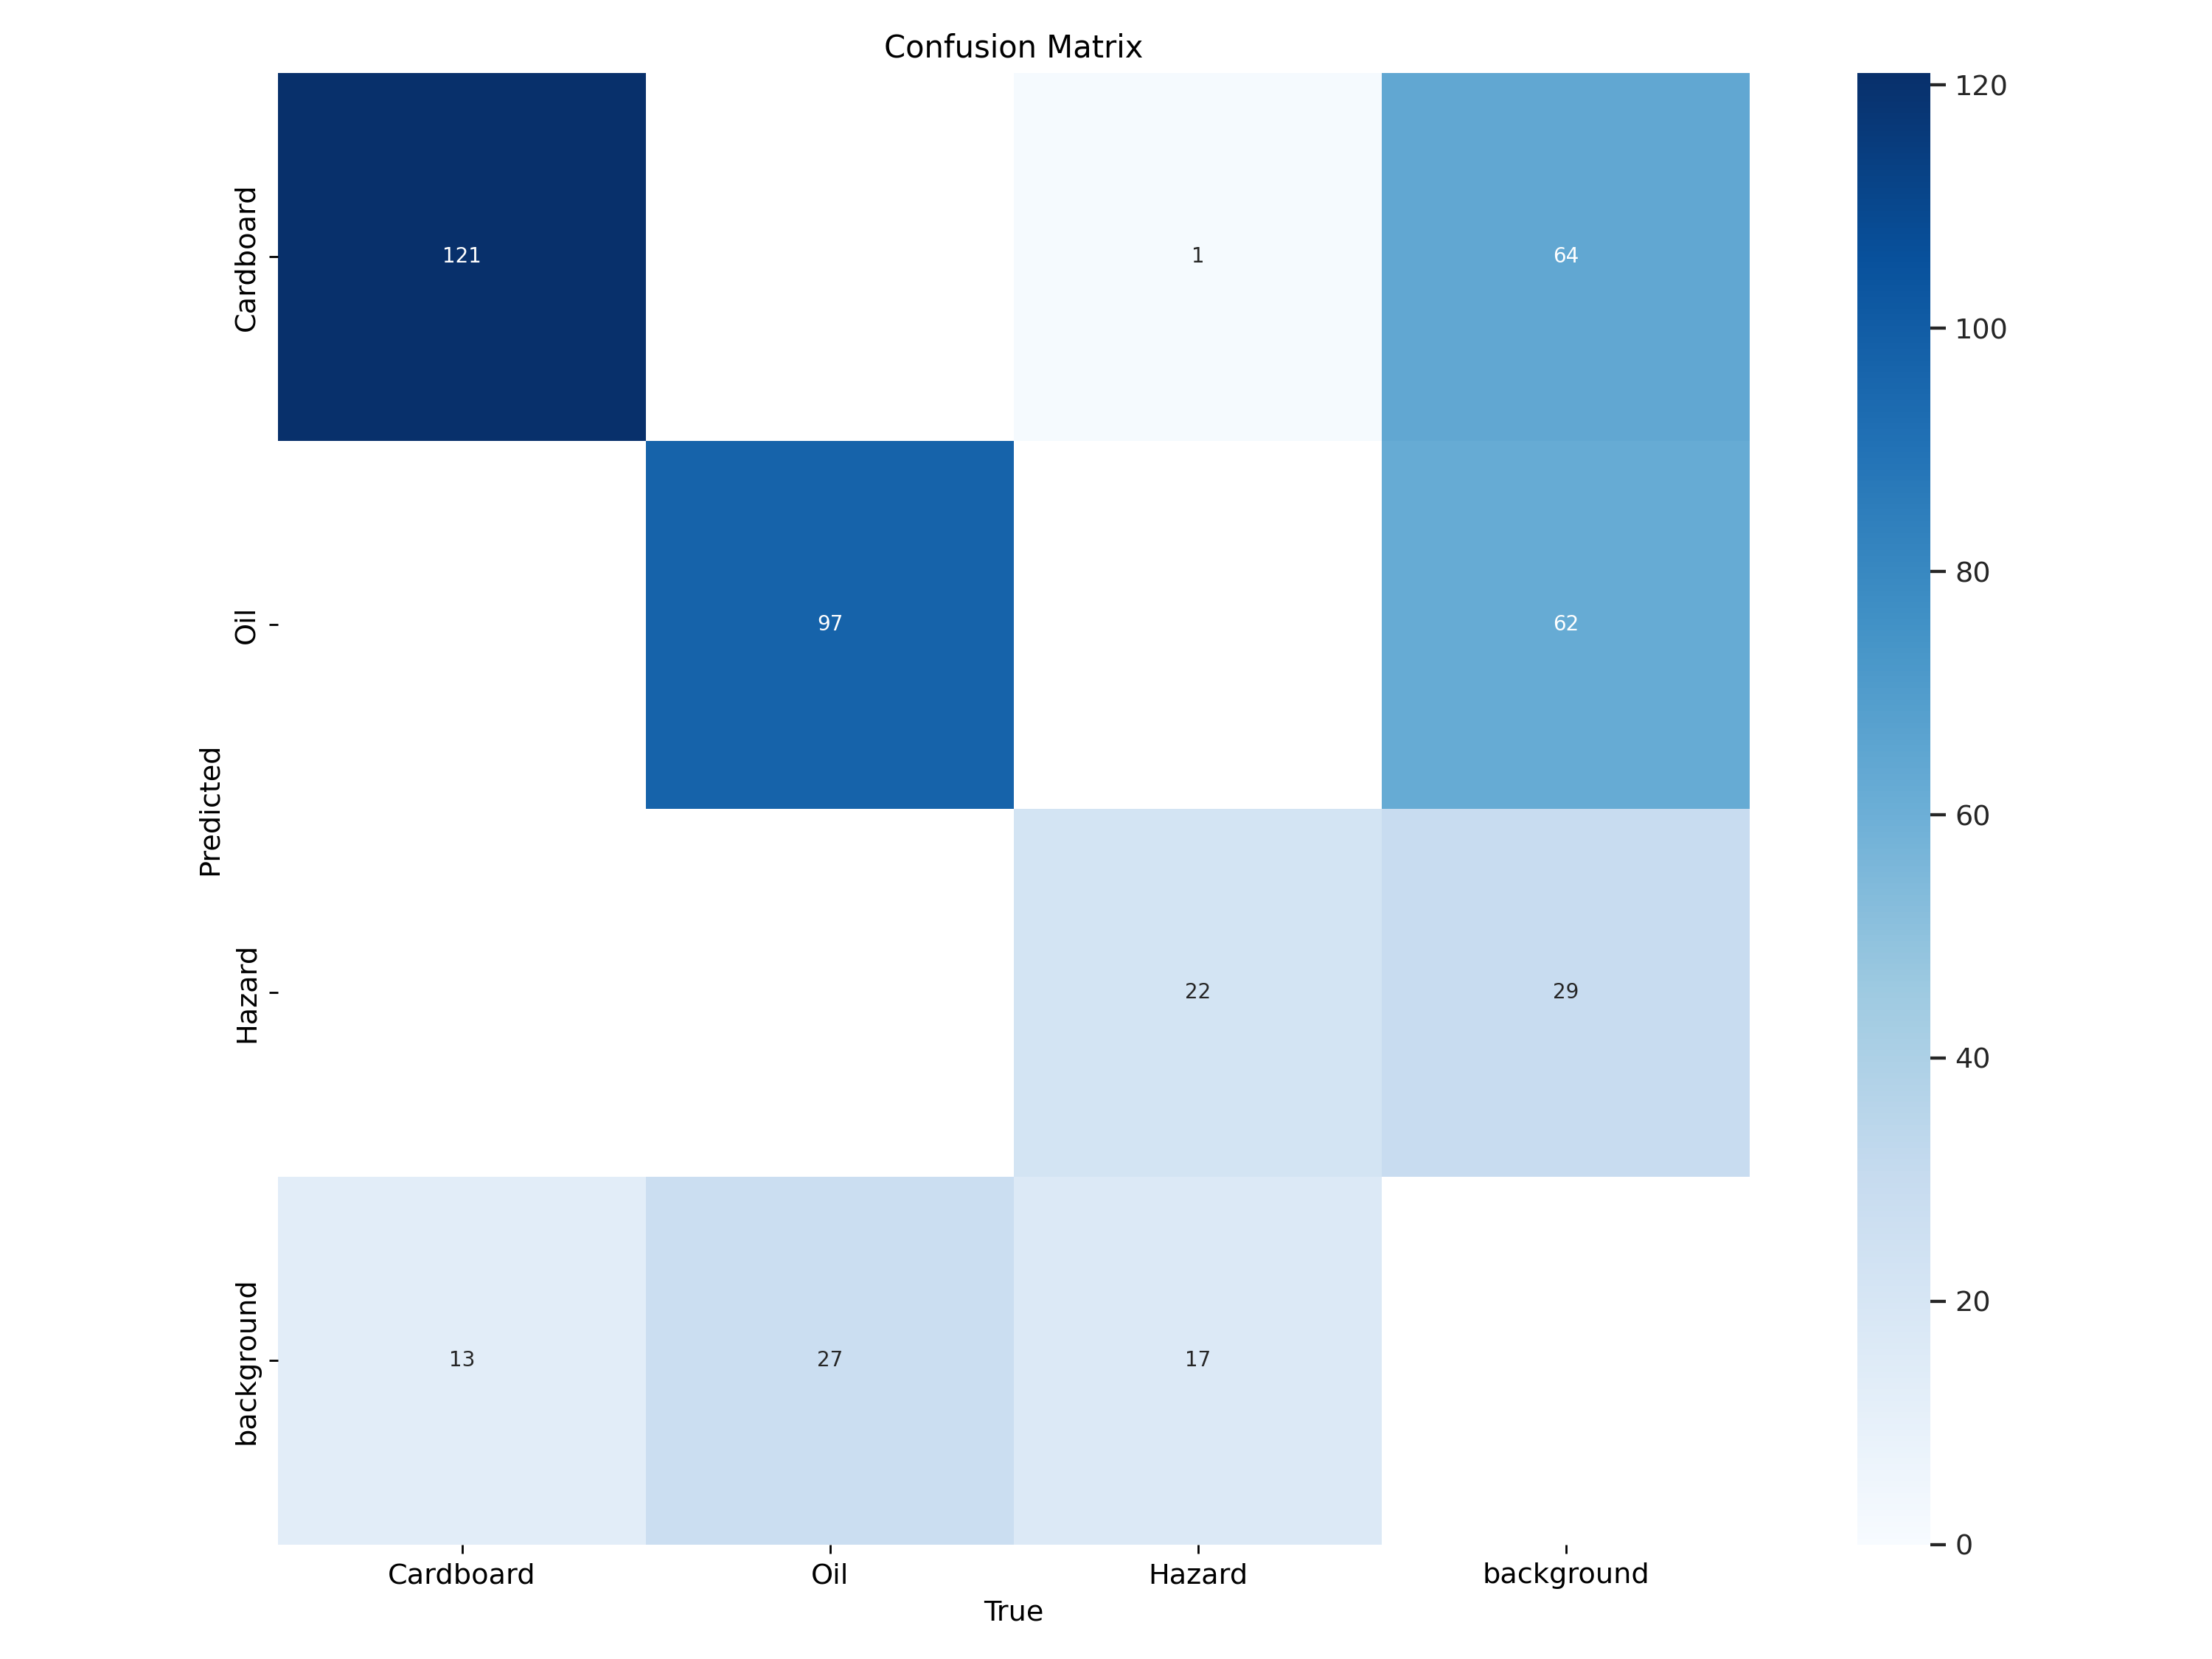

In [ ]:
Image(filename=f'/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/backup_flamable/Trainingrun_SGD_new_Bigbatch_new_dataset/confusion_matrix.png', width=600)

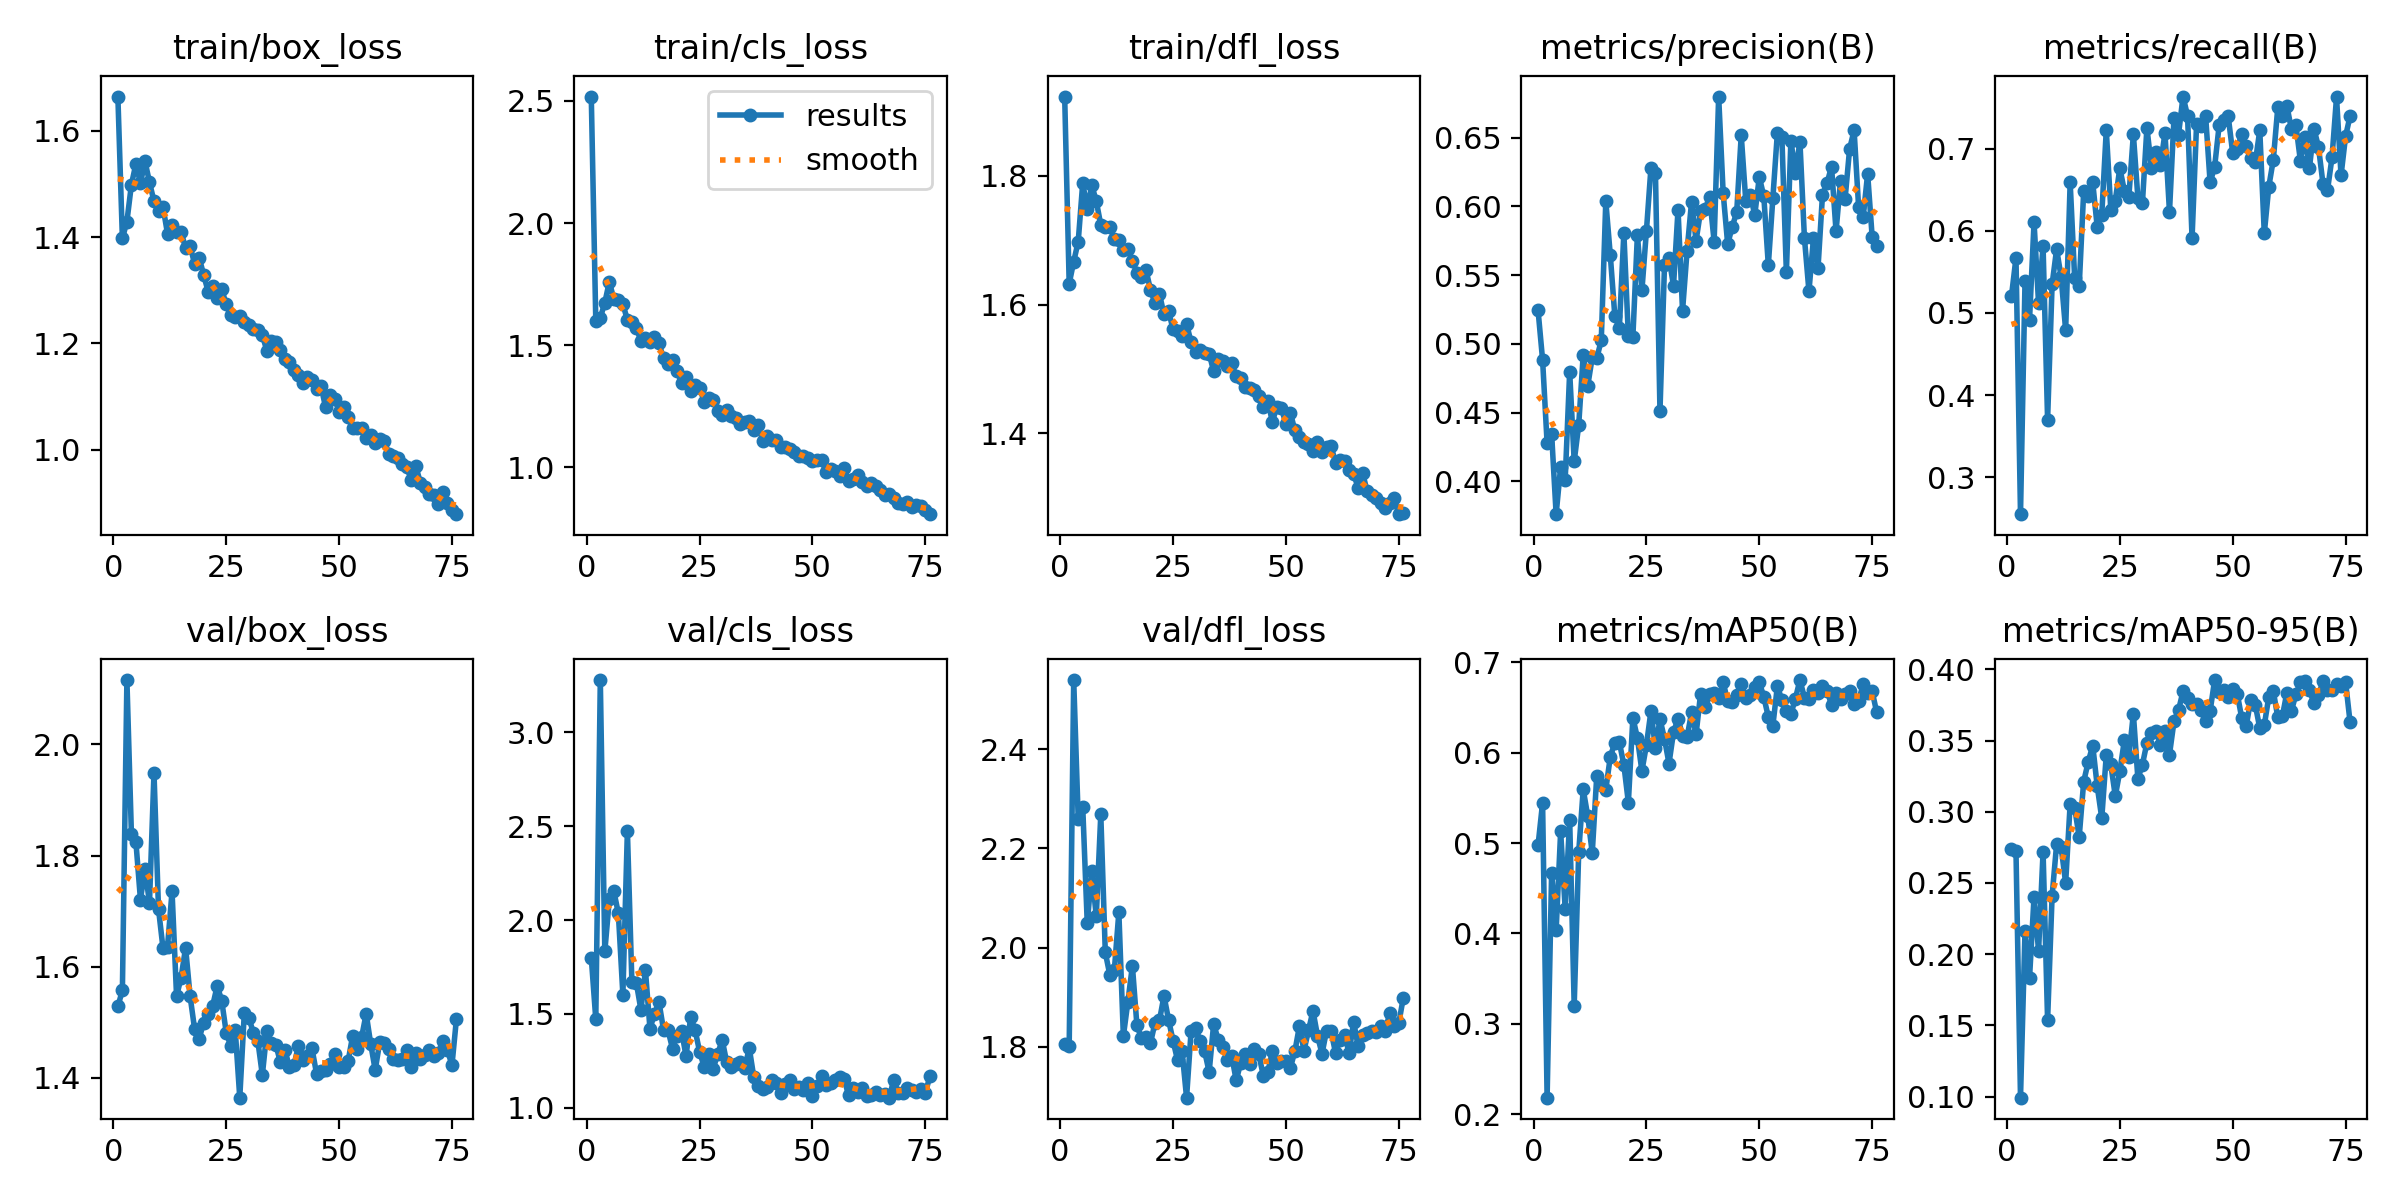

In [ ]:
Image(filename=f'/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/backup_flamable/Trainingrun_SGD_new_Bigbatch_new_dataset/results.png', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/Fire-Detection-2/runs/detect/train10/weights/best.pt data=/content/Fire-Detection-2/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Fire-Detection-2/val_split/labels.cache... 3999 images, 0 backgrounds, 0 corrupt: 100% 3999/3999 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 250/250 [00:45<00:00,  5.44it/s]
                   all       3999      11992      0.927       0.85       0.93      0.797
                  fire       3999       5956      0.937      0.893      0.958      0.808
                 smoke       3999       6036      0.916      0.806      0.902      0.787
Speed: 0.2ms preprocess, 6.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/backup_flamable/Trainingrun_Advanced_Augmentation_SGD/weights/best.pt data=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/data.yaml source=/content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/images


Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/108 /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/images/75_png_jpg.rf.82383fdb0eca1b1dc262add5c5c7f13a.jpg: 640x640 5 Hazards, 9.5ms
image 2/108 /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/images/75_png_jpg.rf.82383fdb0eca1b1dc262add5c5c7f13a_horizontal_flip.jpg: 640x640 4 Hazards, 18.9ms
image 3/108 /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/images/75_png_jpg.rf.82383fdb0eca1b1dc262add5c5c7f13a_horizontal_flip_horizontal_flip.jpg: 640x640 5 Hazards, 9.5ms
image 4/108 /content/drive/MyDrive/Colab_Notebooks/yolov8_Flamable/flamable_dataset_new/test/images/Truck121_jpg.rf.c81be1383854e106c7fbd87d807712a2_horizontal_flip.jpg: 480x640 3 Hazards, 129.8ms
image 5/108 /content/drive/MyDrive/Colab_N

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")

Output hidden; open in https://colab.research.google.com to view.